In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
!pwd
!ls -lrt

/content
total 4
drwxr-xr-x 1 root root 4096 Aug  1 13:24 sample_data


In [6]:
df = pd.read_csv('/content/sample_data/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


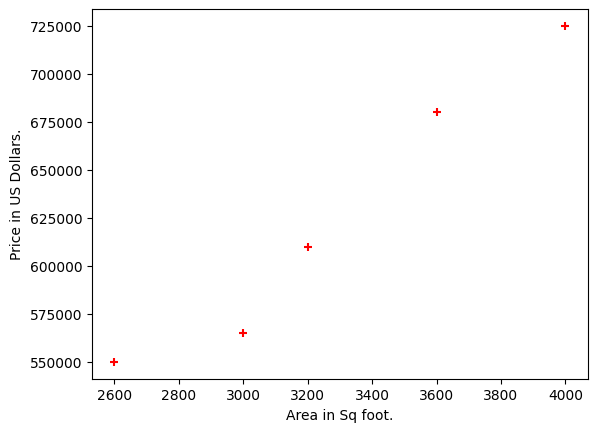

In [11]:
plt.xlabel('Area in Sq foot.')
plt.ylabel('Price in US Dollars.')
plt.scatter(df['area'],df['price'],color='red',marker='+')

In [ ]:
### Simple way
rg = linear_model.LinearRegression()
rg.fit(df[['area']],df['price'])

In [ ]:
rg.predict([[3300]])

In [21]:
###Passing Dataframes as Input instead of static values
new_df = df.drop('price',axis='columns')
#new_df
price = df.price
#price

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [23]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [26]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [33]:
reg.coef_

array([135.78767123])

In [34]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

When substitited,

628715.75342466 = 135.78767123 * 3300 + 180616.43835616432

In [39]:
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

In [41]:
###Now pass dataframe as input to predict price for multiple values
areasdf = pd.read_csv('/content/sample_data/areas.csv')
areasdf

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [46]:
predict_prices=reg.predict(areasdf[['area']])
areasdf['prices']=predict_prices
areasdf

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [47]:
areasdf.to_csv('/content/sample_data/predict_price.csv')